# What is GB and XGB ?
* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. A wide range of applications: Can be used to solve regression, classification



* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance



* Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.



* Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.



* This approach supports both regression and classification predictive modeling problems.


## Decision tree,Bagging,Random forest,Boosting,Gradient Boosting,XGBoost
![](xgbt.png)


**Why does XGBoost perform so well?**
* XGBoost and Gradient Boosting Machines  are both ensemble tree methods that apply the principle of boosting weak           learners using the gradient descent architecture. However, XGBoost improves upon the base GBM frameworkthrough systems optimization and algorithmic enhancements.


#### 1.Regularization:
* This is considered to be as a dominant factor of the algorithm. Regularization is a technique that is used to get rid of overfitting of the model.

#### 2.Cross-Validation:
* We use cross-validation by importing the function from sklearn but XGboost is enabled with inbuilt CV function.

#### 3.Missing Value:  
* It is designed in such a way that it can handle missing values. It finds out the trends in the missing values and apprehends them.

#### 4.Flexibility:
* It gives the support to objective functions. They are the function used to evaluate the performance of the model and also it can handle the user-defined validation metrics.



## System Optimization

#### Parallelization:
* XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.

#### Tree Pruning:
* The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split. XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.


#### Hardware Optimization:
* This algorithm has been designed to make efficient use of hardware resources. This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.









**When to Use XGBoost?**

* 1> When you have large number of observations in training data.**

* 2> Number features < number of observations in training data.**

* 3> It performs well when data has mixture numerical and categorical features or just numeric features.**

* 4> When the model performance metrics are to be considered.**

### Problem Statement:
Build a relevent machine learning model to predict whether person has heart disease or not.

In [3]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
##loading the dataset
data=pd.read_csv('heart.csv')

In [5]:
data

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
Age,40,49,37,48,54,39,45,54,37,48,...,63,63,41,59,57,45,68,57,57,38
Gender,M,F,M,F,M,M,F,M,M,F,...,M,F,M,M,F,M,M,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP,NAP,ATA,ATA,ASY,ATA,...,ASY,ASY,ATA,ASY,ASY,TA,ASY,ASY,ATA,NAP
RestingBP,140,160,130,138,150,120,130,110,140,120,...,140,124,120,164,140,110,144,130,130,138
Cholesterol,289,180,283,214,195,339,237,208,207,284,...,187,197,157,176,241,264,193,131,236,175
FastingBS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,LVH,Normal,Normal,LVH,Normal,Normal,Normal,Normal,LVH,Normal
MaxHR,172,156,98,108,122,170,170,142,130,120,...,144,136,182,90,123,132,141,115,174,173
ExerciseAngina,N,N,N,Y,N,N,N,N,Y,N,...,Y,Y,N,N,Y,N,N,Y,N,N
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0,...,4.0,0.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0,0.0


# Basic checks

In [9]:
data.shape

(918, 12)

In [10]:
data.head()#first five rows

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
data.tail()#last five rows

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [12]:
data.info()#to check null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
data["Cholesterol"].median()

223.0

In [16]:
data.describe(include='O')

,Gender,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [17]:
cat_data = data.select_dtypes(include='O').columns
cat_data
# type(cat_data)
# cat_data.dtype

Index(['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [20]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('**********************')

Gender ['M' 'F']
Gender
M    725
F    193
Name: count, dtype: int64
**********************
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
**********************
RestingECG ['Normal' 'ST' 'LVH']
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
**********************
ExerciseAngina ['N' 'Y']
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
**********************
ST_Slope ['Up' 'Flat' 'Down']
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
**********************


# Exploratory Data Analysis (EDA)

### Univariate Analysis

In [14]:
data.shape

(918, 12)

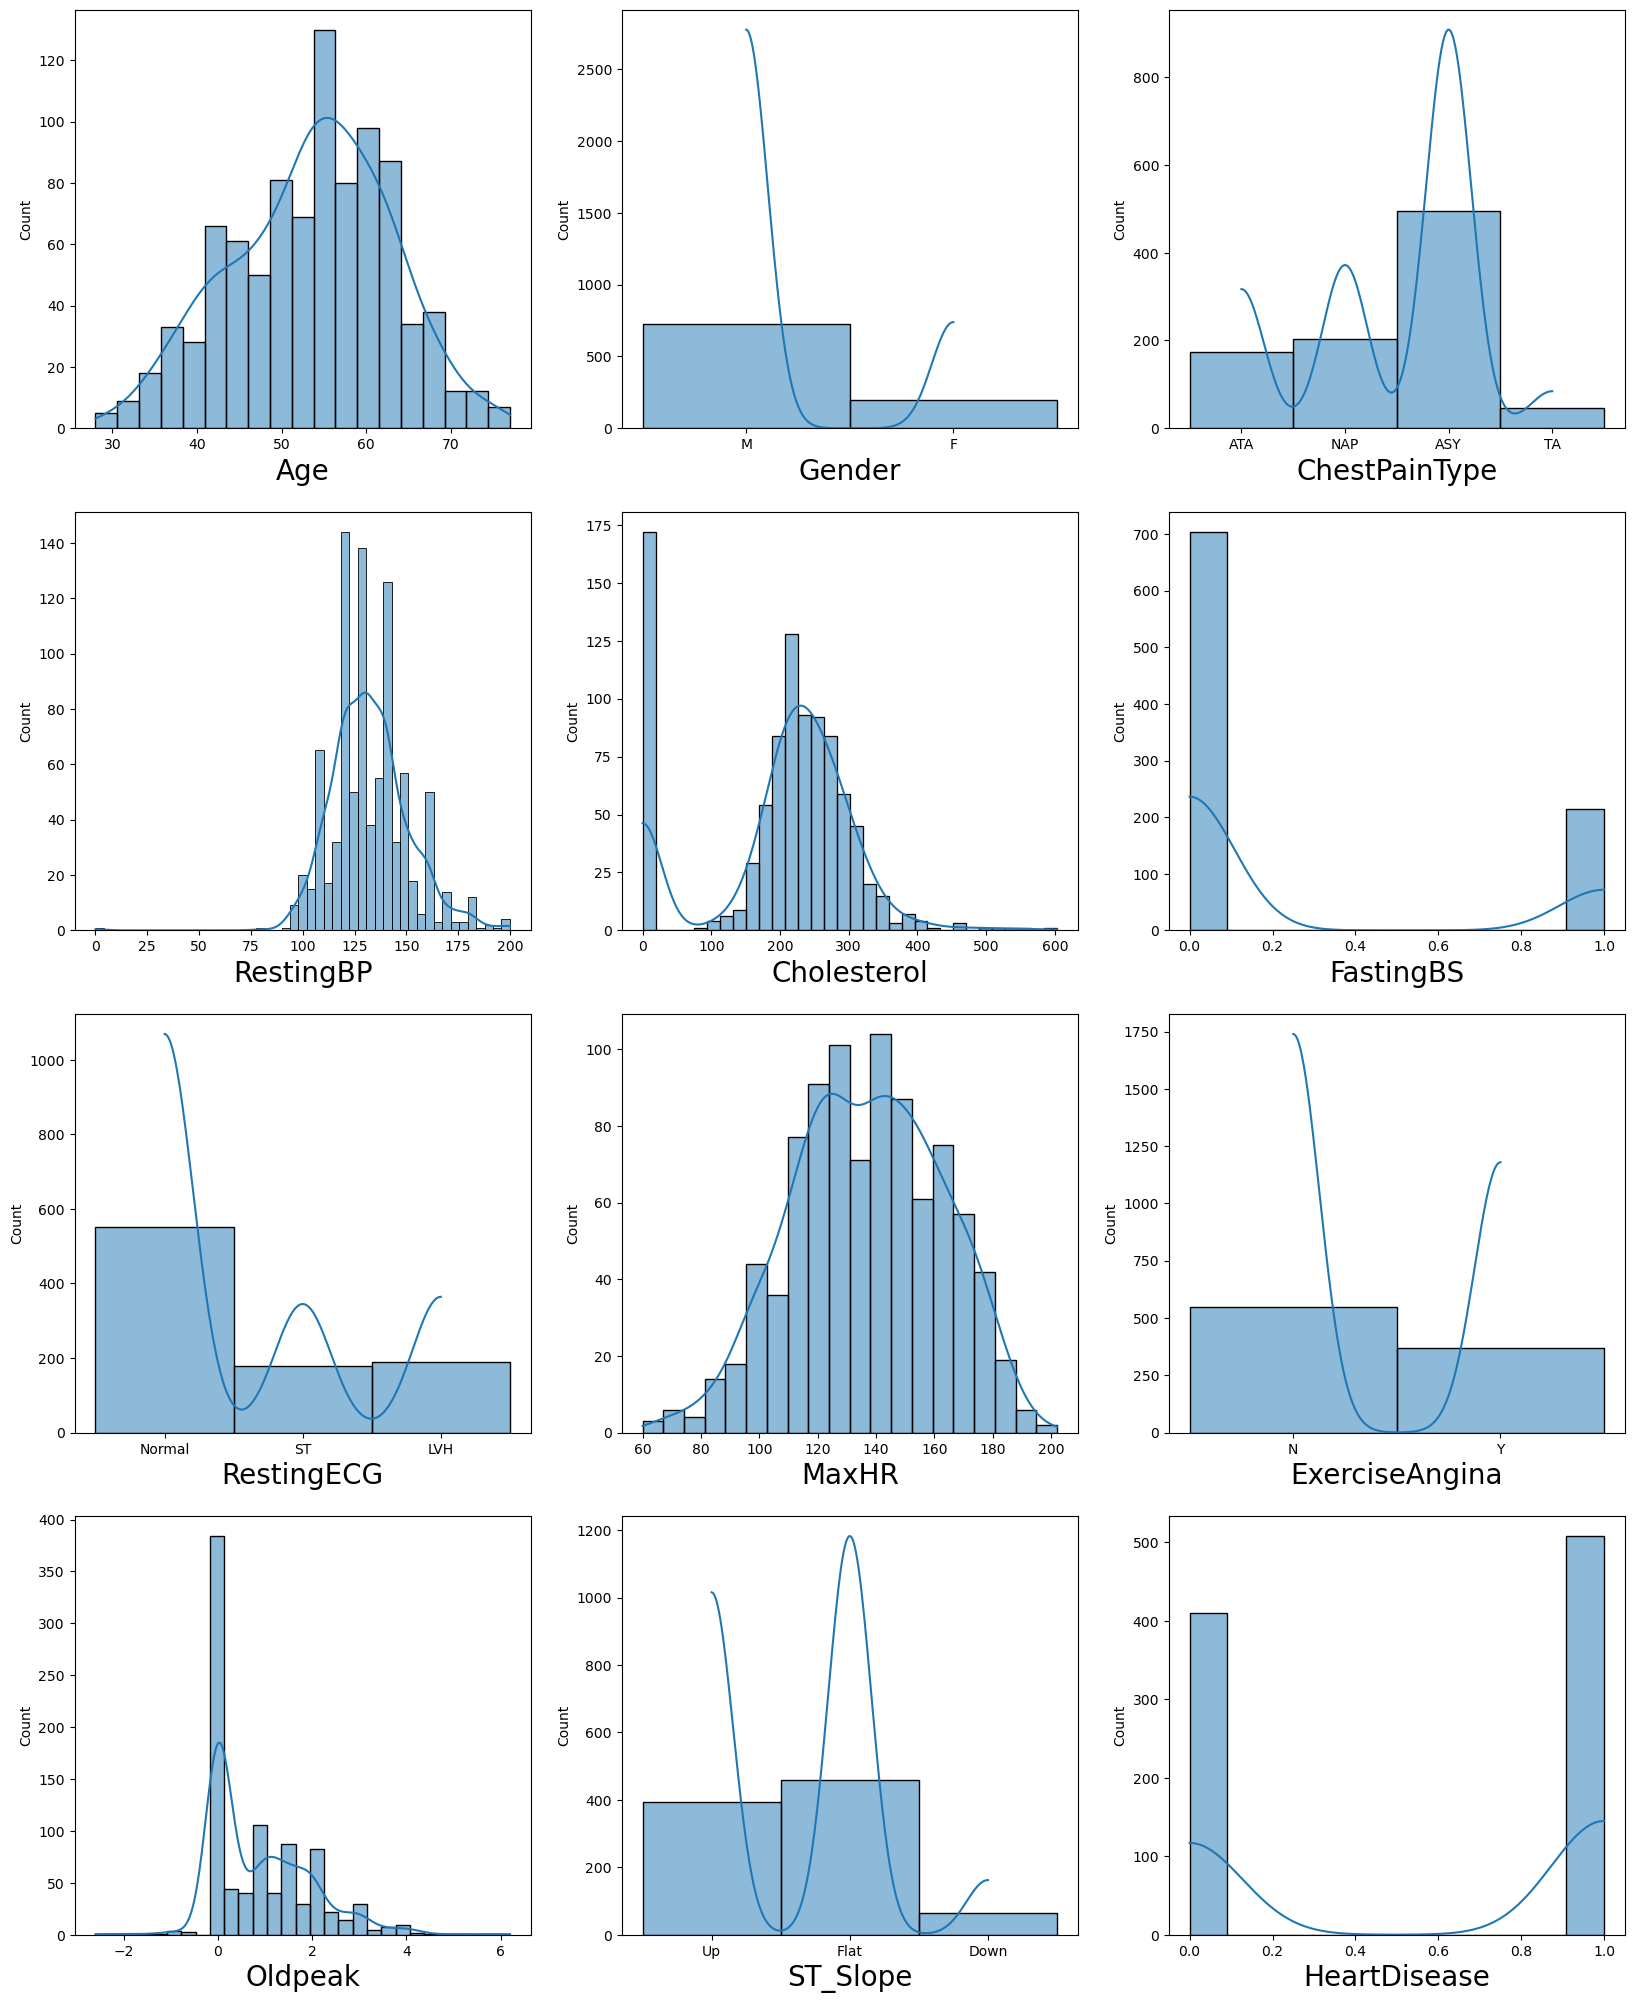

In [21]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas
for column in data.columns: # iteration of columns / acessing the columns from  dataset    # as there are 9 columns in the data
    ax = plt.subplot(4,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
    sns.histplot(x=data[column] ,kde=True) ## it give frequency hue =value counts
    plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

In [16]:
data.MaxHR.skew()

np.float64(-0.14435941846180994)

### Bivariate Analysis

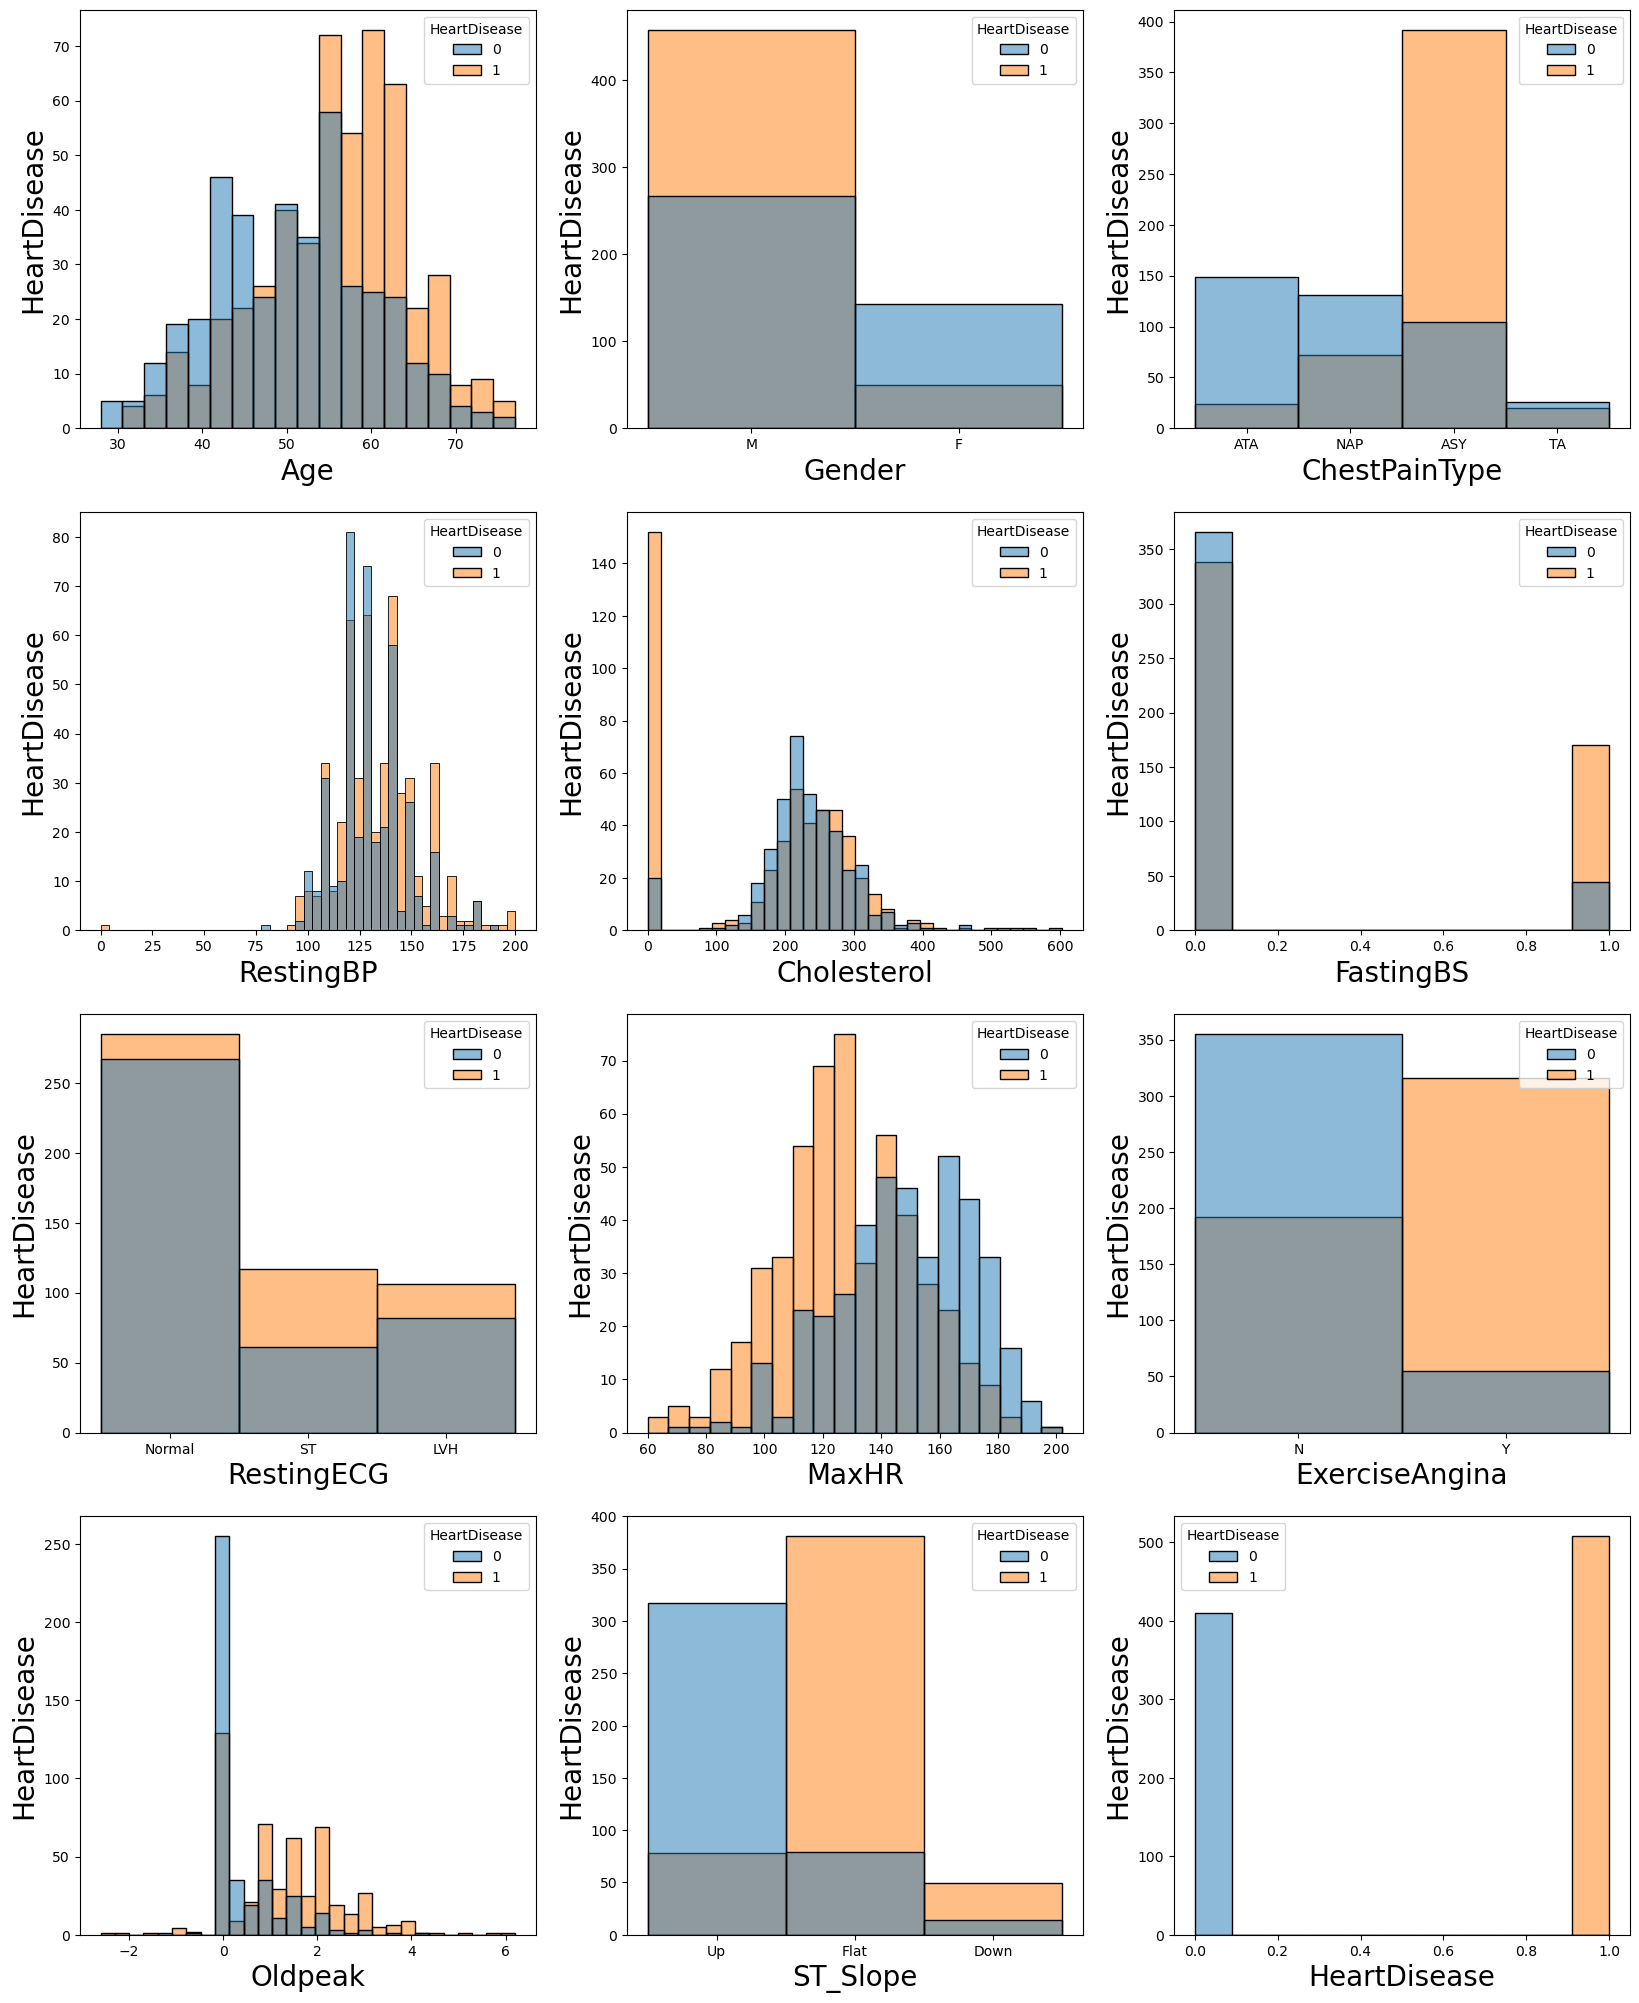

In [17]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas

for column in data.columns: # iteration of columns / acessing the columns from  dataset    # as there are 9 columns in the data
    ax = plt.subplot(4,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
    sns.histplot(x=data[column],hue=data.HeartDisease) ## it give frequency hue =value counts
    plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
    plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber
plt.show()# to show graph

# Data preprocessing

### Checking for null values

In [22]:
data.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
cat_data

Index(['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

### Conversion of categorical columns in to numerical columns

## 1.Gender

### Using LabelEncoder to convert

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lb = LabelEncoder()
data.Gender = lb.fit_transform(data['Gender'])

In [26]:
data.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2.ChestPain Type




### Frequency encoding

In [27]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [28]:
data.head()

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
data.cpt

0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: cpt, Length: 918, dtype: object

In [30]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [31]:
data.cpt.value_counts()

cpt
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [32]:
data.loc[data['cpt']=='ASY']

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,1,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
13,49,1,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
16,38,1,ASY,110,196,0,Normal,166,N,0.0,Flat,1
18,60,1,ASY,100,248,0,Normal,125,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,0,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
911,59,1,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,0,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [33]:
#Frequency encoding
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0

In [34]:
data.head()

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0


# 3. RestingECG

In [36]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
data.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [38]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [39]:
data.head(2)

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,N,0.0,Up,0
1,49,0,2,160,180,0,2,156,N,1.0,Flat,1


# ExerciseAngina

In [40]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [41]:
data.ExerciseAngina = lb.fit_transform(data['ExerciseAngina'])

In [42]:
data.head()

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,Up,0
1,49,0,2,160,180,0,2,156,0,1.0,Flat,1
2,37,1,1,130,283,0,0,98,0,0.0,Up,0
3,48,0,3,138,214,0,2,108,1,1.5,Flat,1
4,54,1,2,150,195,0,2,122,0,0.0,Up,0


# ST_Slope

In [43]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [45]:
data.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [46]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0

In [47]:
data.head()

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,1,0
1,49,0,2,160,180,0,2,156,0,1.0,2,1
2,37,1,1,130,283,0,0,98,0,0.0,1,0
3,48,0,3,138,214,0,2,108,1,1.5,2,1
4,54,1,2,150,195,0,2,122,0,0.0,1,0


In [48]:
data.describe()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    int64  
 2   cpt             918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [44]:
data.cpt

0      1
1      2
2      1
3      3
4      2
      ..
913    0
914    3
915    3
916    1
917    2
Name: cpt, Length: 918, dtype: object

In [50]:
data.RestingBP.mean()

np.float64(132.39651416122004)

In [52]:
data.RestingBP.replace(0,data.RestingBP.mean(),inplace = True)

In [53]:
data.describe()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.540737,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,17.989932,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,80.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [54]:
data.Cholesterol.replace(0,data.Cholesterol.median(),inplace = True)

In [55]:
data.describe()

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.540737,240.581699,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,17.989932,53.982967,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [56]:
data.FastingBS.unique()

array([0, 1])

In [57]:
data.head()

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289,0,2,172,0,0.0,1,0
1,49,0,2,160.0,180,0,2,156,0,1.0,2,1
2,37,1,1,130.0,283,0,0,98,0,0.0,1,0
3,48,0,3,138.0,214,0,2,108,1,1.5,2,1
4,54,1,2,150.0,195,0,2,122,0,0.0,1,0


In [58]:
# loc will replace the categorical column intothe numerical but it will not change the datatype
data.dtypes

Age                 int64
Gender              int64
cpt                object
RestingBP         float64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [59]:
data.cpt=data['cpt'].astype('int32')

In [60]:
data.RestingECG=data['RestingECG'].astype('int32')

In [61]:
data.ST_Slope=data['ST_Slope'].astype('int32')

In [62]:
data.dtypes

Age                 int64
Gender              int64
cpt                 int32
RestingBP         float64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    int64  
 2   cpt             918 non-null    int32  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 75.4 KB


### checking for constant columns

In [58]:
data.describe()#check for std =0

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.540737,240.581699,0.233115,1.407407,136.809368,0.404139,0.887364,1.432462,0.553377
std,9.432617,0.407701,0.931031,17.989932,53.982967,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,2.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Feature Selection


<Axes: >

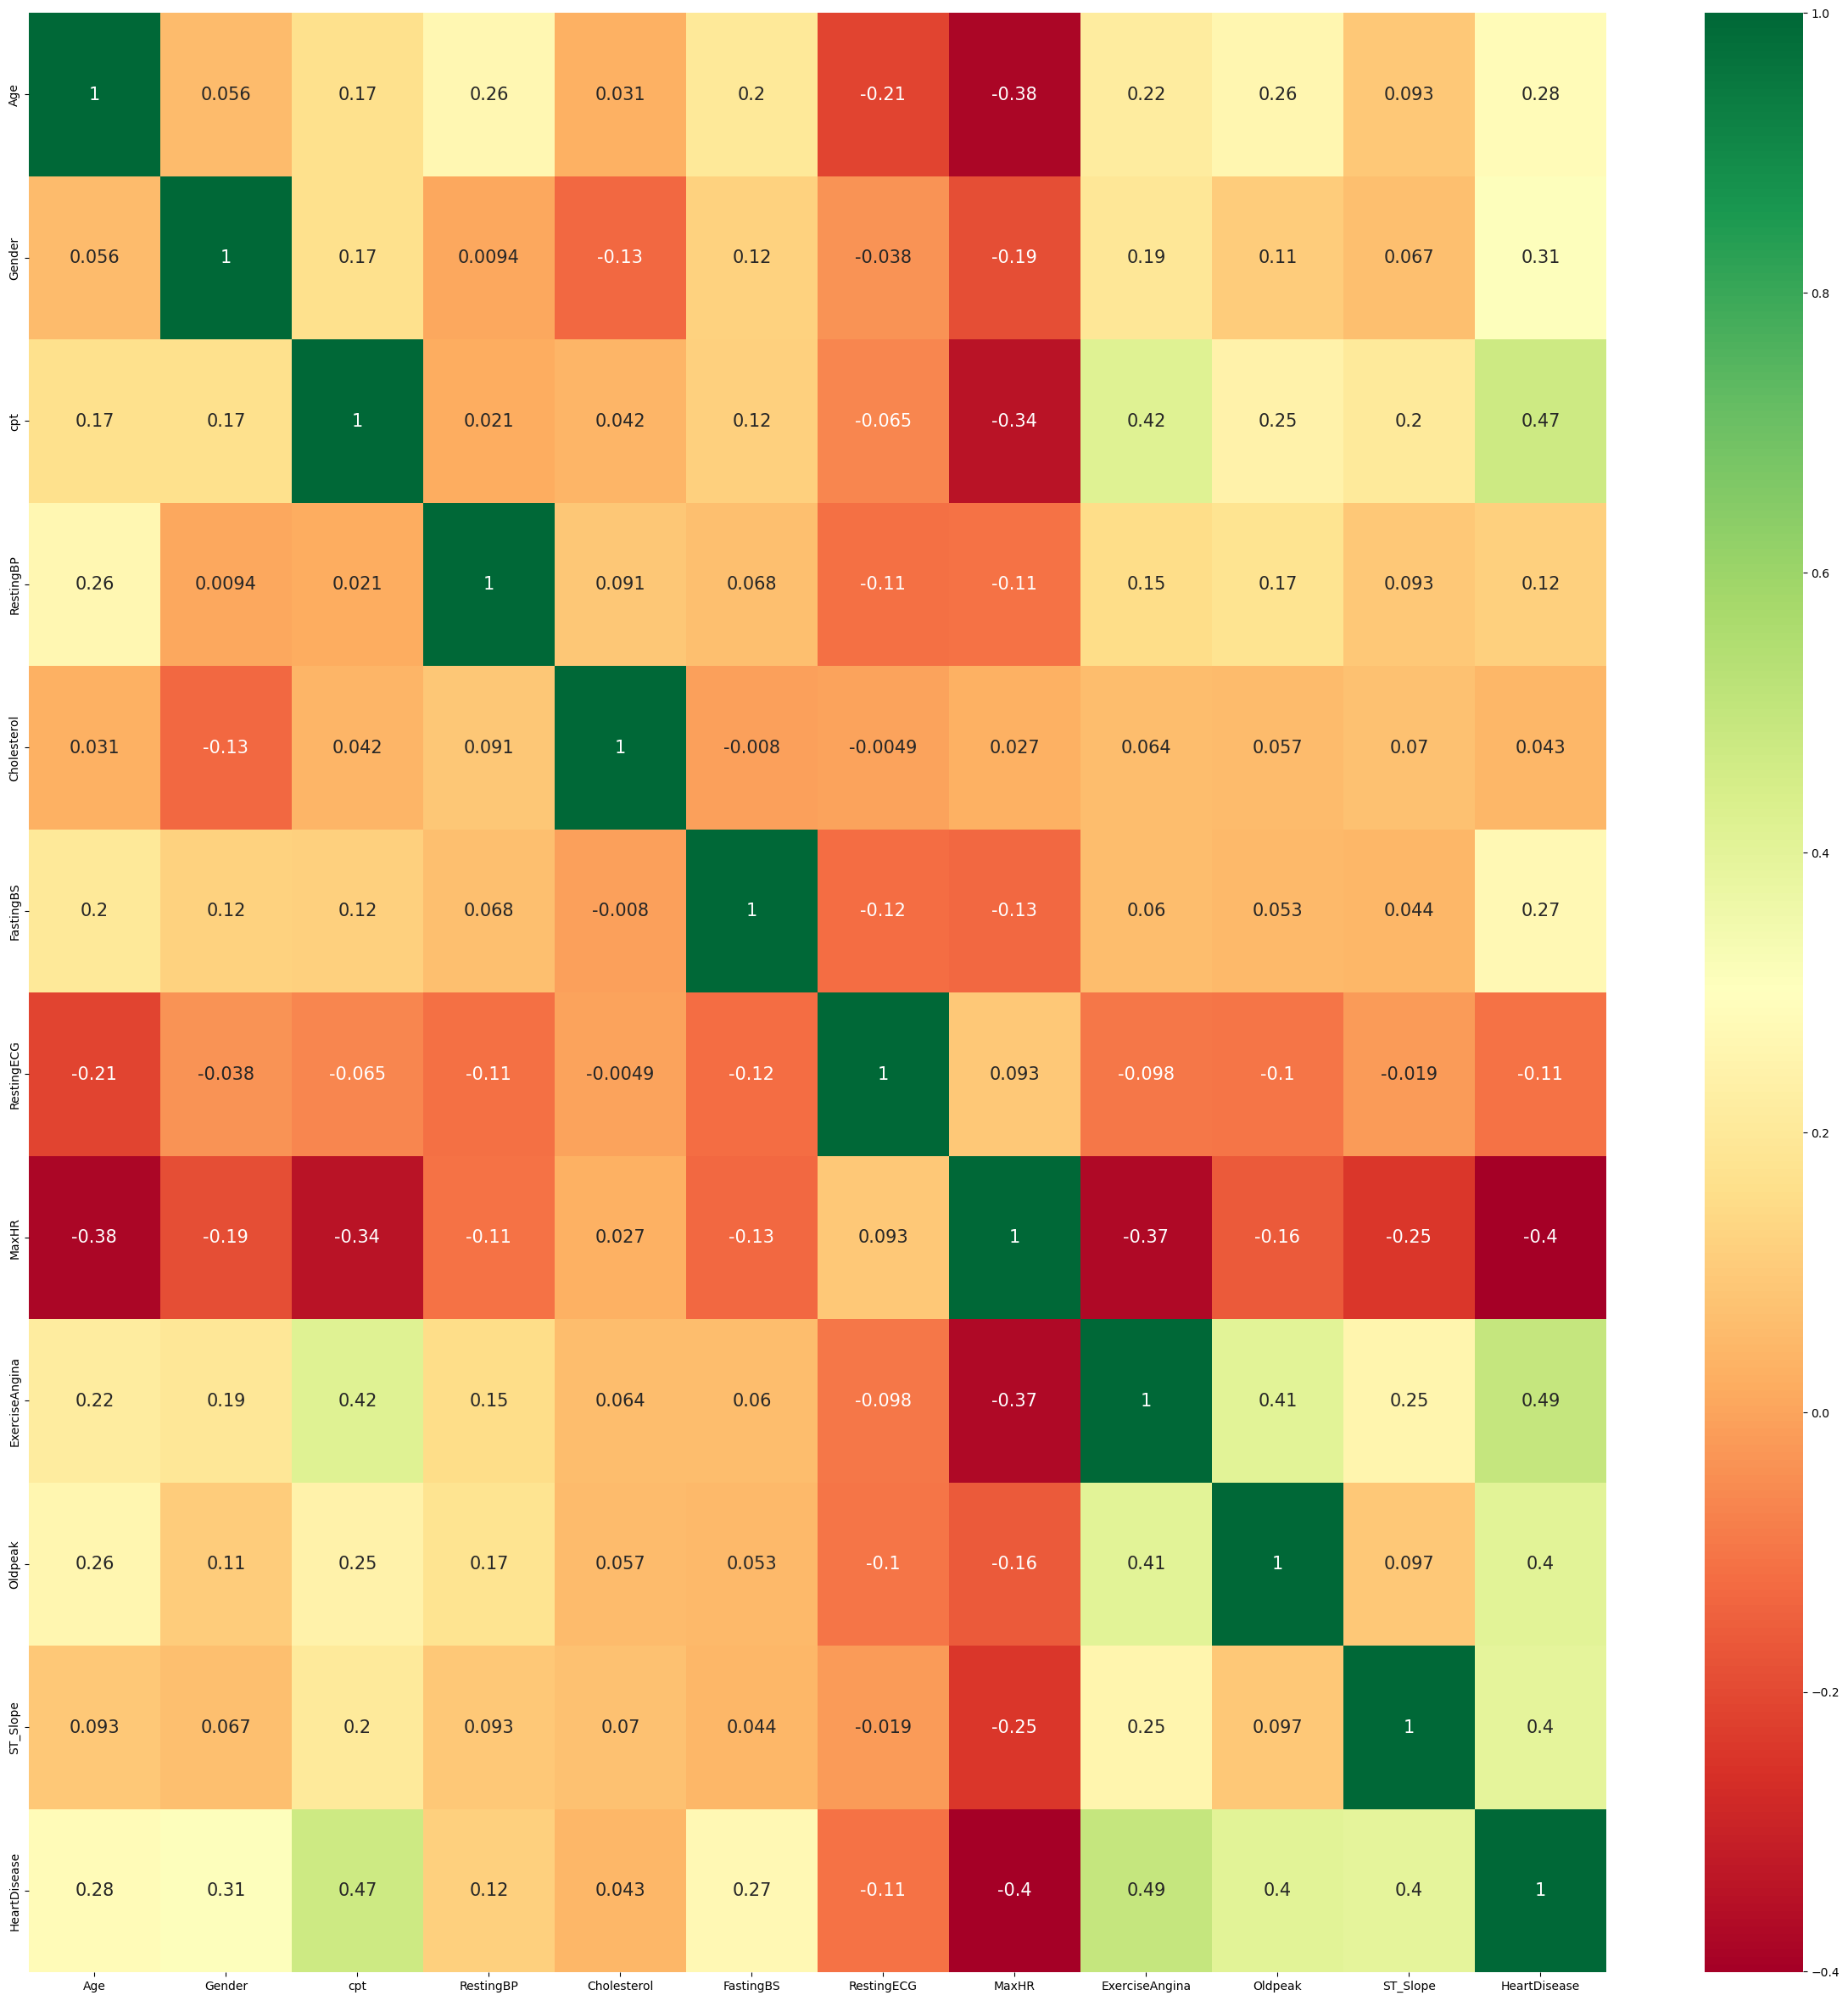

In [64]:
## Checking correlation
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

# Model creation

In [65]:
data.columns

Index(['Age', 'Gender', 'cpt', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [66]:
## creating X and y
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease #dependent variabel or target

In [67]:
X

,Age,Gender,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140.0,289,0,2,172,0,0.0,1
1,49,0,2,160.0,180,0,2,156,0,1.0,2
2,37,1,1,130.0,283,0,0,98,0,0.0,1
3,48,0,3,138.0,214,0,2,108,1,1.5,2
4,54,1,2,150.0,195,0,2,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110.0,264,0,2,132,0,1.2,2
914,68,1,3,144.0,193,1,2,141,0,3.4,2
915,57,1,3,130.0,131,0,2,115,1,1.2,2
916,57,0,1,130.0,236,0,1,174,0,0.0,2


In [63]:
y#calling y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [68]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# what is Gradient Boosting ?
* Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [69]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100) ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm = gbm.predict(X_test)#predicting the target

In [70]:
y_gbm # prediction made by model

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [67]:
y_test # actual output

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [71]:
## evaluation the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.842391304347826

In [72]:
f1_score(y_test,y_gbm)

0.8585365853658536

In [73]:
## Training

In [74]:
y_gbm1 = gbm.predict(X_train)#predicting the target
accu_scor=accuracy_score(y_train,y_gbm1)
accu_scor

0.9427792915531336

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred)

0.8369565217391305

In [74]:
f1_score(y_test,y_pred)

0.8529411764705882

In [75]:
# svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.6467391304347826

### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.7717391304347826

In [79]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.8695652173913043

In [81]:
# Training acc

In [82]:
y_pred1=RF.predict(X_train)
accuracy_score(y_train,y_pred1)

1.0

In [83]:
## Installing XGB library

In [84]:
# !pip install xgboost

In [85]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## object creation
xgb_c.fit(X_train,y_train)# fitting the data
y_hat=xgb_c.predict(X_test)#predicting the target

In [86]:
y_hat

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1])

In [87]:
accuracy_score(y_test,y_hat)

0.8641304347826086

In [88]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [89]:
y_hat1=xgb_c.predict(X_train) #predicting the target
accuracy_score(y_train,y_hat1)

1.0

# Hyper parameter tunning in XG boost

In [90]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],# minimum loss reduction required to do further split
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7], # slow down the learning process
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],# regularization parameter used to prevent overfitting
              'reg_lambda':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]

             }


XGB=XGBClassifier(random_state=42,verbosity=2)
#tree_cv = GridSearchCV(XGB, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#tree_cv.fit(X_train,y_train)
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters

print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[13:04:08] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (734, 11, 8074).
Best paramters: {'reg_lambda': 6.4, 'reg_alpha': 1.6, 'n_estimators': 150, 'max_depth': 13, 'learning_rate': 0.03, 'gamma': 1.6})


In [91]:
XGB2=XGBClassifier(reg_lambda=6.4,reg_alpha=1.6,n_estimators=150,max_depth=13,learning_rate=0.1,gamma=3.2,random_state=2)
XGB2.fit(X_train, y_train)#training
y_predict=XGB2.predict(X_test)#testing
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [92]:
y_train_pred=XGB2.predict(X_train)

In [93]:
accuracy_score(y_test,y_predict)

0.875

In [94]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [95]:
# Training

In [96]:
accuracy_score(y_train,y_train_pred)

0.8801089918256131

## XGBoost
### Pros
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting

### Cons
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned proper


![](def2.png)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [79]:
acc_knn = accuracy_score(y_test, y_knn)

In [80]:
acc_knn

0.6684782608695652

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
hyper = {"n_neighbors" : np.arange(1,10),
        "p": [1,2]}

In [83]:
gscv_knn = GridSearchCV(estimator=knn, param_grid= hyper, cv=5)
gscv_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2]})

In [84]:
gscv_knn.best_params_

{'n_neighbors': np.int64(9), 'p': 1}

In [85]:
knn_best = gscv_knn.best_estimator_

In [86]:
y_gscv = knn_best.predict(X_test)
y_gscv

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [88]:
acc_gscv_test = accuracy_score(y_test, y_gscv)
acc_gscv_test

0.7010869565217391

In [89]:
y_gscv_train = knn_best.predict(X_train)

In [93]:
acc_gscv_train = accuracy_score(y_train, y_gscv_train)
acc_gscv_train

0.784741144414169